In [153]:
import os.path
from unittest.mock import inplace

import pandas as pd

In [154]:
data_path = os.path.join("..", "data", "raw")


In [155]:
df_taxi_owners = pd.read_pickle(os.path.join(data_path, "taxi_owners.p"))
df_taxi_vechicles = pd.read_pickle(os.path.join(data_path, "taxi_vehicles.p"))

In [156]:
df_taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [157]:
df_taxi_owners.columns


Index(['rid', 'vid', 'owner', 'address', 'zip'], dtype='object')

In [158]:
df_taxi_vechicles.columns


Index(['vid', 'make', 'model', 'year', 'fuel_type', 'owner'], dtype='object')

In [159]:
df_taxi_own_vech = df_taxi_owners.merge(df_taxi_vechicles, on="vid")

In [160]:
df_taxi_own_vech.head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [161]:
print(df_taxi_own_vech.shape, df_taxi_owners.shape, df_taxi_vechicles.shape)

(3519, 10) (3519, 5) (3519, 6)


In [162]:
#suffixes
df_taxi_owners.merge(df_taxi_vechicles, on="vid", suffixes=('_owners', '_vehicles')).head()

,rid,vid,owner_owners,address,zip,make,model,year,fuel_type,owner_vehicles
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


###Indicator

In [163]:
df_taxi_owners.merge(df_taxi_vechicles, on="vid", indicator=True)["_merge"].value_counts()

_merge
both          3519
left_only        0
right_only       0
Name: count, dtype: int64

### Validate


In [164]:
df_taxi_owners.merge(df_taxi_vechicles, on="vid", validate='many_to_many').head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [165]:
df_taxi_owners_sample = df_taxi_owners.sample(frac=0.8)
df_taxi_owners_duplicated = pd.concat([df_taxi_owners, df_taxi_owners_sample], ignore_index=True)

In [166]:
df_taxi_owners_duplicated.merge(df_taxi_vechicles, on="vid", how='right', validate='many_to_one').head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T2767,2767,SEYED M. BADRI,510 W. BELMONT AVE.,60657,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,T2767,2767,SEYED M. BADRI,510 W. BELMONT AVE.,60657,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
2,T1411,1411,DESZY CORP.,3351 W. ADDISON ST.,60618,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
3,T1411,1411,DESZY CORP.,3351 W. ADDISON ST.,60618,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
4,T6500,6500,AGAPH CAB CORP,2945 W. PETERSON AVE.,60659,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP


### ignore_index


In [167]:
df_5 = df_taxi_owners.head()
df_15 = df_taxi_owners[15:20]

In [168]:
df_5

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [169]:
df_15

,rid,vid,owner,address,zip
15,T5494,5494,NBA TAXI INC.,4020 W. GLENLAKE AVE.,60646
16,T227,227,BABY CAB CORP.,2617 S. WABASH AVE.,60616
17,T1609,1609,MG & KA INC,3351 W. ADDISON ST.,60618
18,T1447,1447,SNOWSTORM II HACKING CORP.,2617 S. WABASH AVE.,60616
19,T468,468,M ASANTE INC.,3351 W. ADDISON ST.,60618


In [170]:
pd.concat([df_5, df_15], ignore_index=False)

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618
15,T5494,5494,NBA TAXI INC.,4020 W. GLENLAKE AVE.,60646
16,T227,227,BABY CAB CORP.,2617 S. WABASH AVE.,60616
17,T1609,1609,MG & KA INC,3351 W. ADDISON ST.,60618
18,T1447,1447,SNOWSTORM II HACKING CORP.,2617 S. WABASH AVE.,60616
19,T468,468,M ASANTE INC.,3351 W. ADDISON ST.,60618


In [171]:
pd.concat([df_5, df_15], ignore_index=True)

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618
5,T5494,5494,NBA TAXI INC.,4020 W. GLENLAKE AVE.,60646
6,T227,227,BABY CAB CORP.,2617 S. WABASH AVE.,60616
7,T1609,1609,MG & KA INC,3351 W. ADDISON ST.,60618
8,T1447,1447,SNOWSTORM II HACKING CORP.,2617 S. WABASH AVE.,60616
9,T468,468,M ASANTE INC.,3351 W. ADDISON ST.,60618


### left_on, right_on

In [172]:
df_taxi_vechicles_renamed = df_taxi_vechicles.rename(mapper={
    'vid': 'vid_pro'},
    axis=1)

In [173]:
df_taxi_vechicles_renamed.columns


Index(['vid_pro', 'make', 'model', 'year', 'fuel_type', 'owner'], dtype='object')

In [174]:
df_taxi_owners_duplicated.merge(df_taxi_vechicles_renamed, left_on="vid", right_on="vid_pro")

,rid,vid,owner_x,address,zip,vid_pro,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,6285,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,4862,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,1495,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,4231,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,5971,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.
...,...,...,...,...,...,...,...,...,...,...,...
6329,T374,374,GALA CAB CORP.,2617 S. WABASH AVE.,60616,374,FORD,ESCAPE,2012,HYBRID,GALA CAB CORP.
6330,T3230,3230,FULL MOON CAB COMPANY,9696 W. FOSTER AVE.,60656,3230,TOYOTA,PRIUS,2012,HYBRID,FULL MOON CAB COMPANY
6331,T1256,1256,YC21 LLC,3351 W. ADDISON ST.,60618,1256,TOYOTA,PRIUS,2015,HYBRID,YC21 LLC
6332,T5849,5849,SUPER VENTURE CORP,3351 W. ADDISON ST.,60618,5849,TOYOTA,PRIUS,2015,HYBRID,SUPER VENTURE CORP


### how


In [175]:
df_taxi_owners_mod = df_taxi_owners.copy()

In [176]:
from random import randint

df_taxi_owners_mod.dtypes

rid        object
vid        object
owner      object
address    object
zip        object
dtype: object

In [177]:
df_taxi_owners_mod["vid"] = df_taxi_owners_mod.apply(
    lambda row: row["vid"] + str(randint(0, 10)) if randint(0, 1) else row["vid"], axis=1)

In [178]:
#inner - vid w obu df musi mieć dopasowanie
df_taxi_owners_duplicated.merge(df_taxi_vechicles, on="vid").shape

(6334, 10)

In [179]:
df_taxi_owners_mod["vid"].isna().sum()

np.int64(0)

In [180]:
df_taxi_owners_mod.shape

(3519, 5)

In [181]:
df_taxi_owners_mod.merge(df_taxi_vechicles, on="vid").shape

(1771, 10)

In [182]:
# left - wszystkie lewe + dopasowanie

In [183]:
df_taxi_owners_mod.merge(df_taxi_vechicles, on="vid", how="left").shape


(3519, 10)

In [184]:
df_taxi_owners_mod.merge(df_taxi_vechicles, on="vid", how="left").isna().sum()

rid             0
vid             0
owner_x         0
address         0
zip             0
make         1748
model        1748
year         1748
fuel_type    1748
owner_y      1748
dtype: int64

In [185]:
# right - wszystkie prawe + dopasowanie
df_taxi_owners_mod.merge(df_taxi_vechicles, on="vid", how="right").shape

(3559, 10)

In [186]:
df_taxi_owners_mod.merge(df_taxi_vechicles, on="vid", how="right").isna().sum()

rid          1788
vid             0
owner_x      1788
address      1788
zip          1788
make            0
model           0
year            0
fuel_type       0
owner_y         0
dtype: int64

In [187]:
df_taxi_owners_mod.merge(df_taxi_vechicles, on="vid", how="outer").shape

(5307, 10)

In [188]:
df_crews = pd.read_pickle(os.path.join(data_path, "crews.p"))

In [189]:
df_crews.columns


Index(['id', 'department', 'job', 'name'], dtype='object')

In [190]:
df_crews.head()


,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [191]:
df_crew_self = df_crews.merge(df_crews, on="id", how="inner", suffixes=("_dir", "_crew"))

In [192]:
df_crew_self

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron
...,...,...,...,...,...,...,...
834189,25975,Directing,Director,Jon Gunn,Directing,Director,Brett Winn
834190,25975,Directing,Director,Brett Winn,Production,Executive Producer,Clark Peterson
834191,25975,Directing,Director,Brett Winn,Directing,Director,Brian Herzlinger
834192,25975,Directing,Director,Brett Winn,Directing,Director,Jon Gunn


In [193]:
df_crew_self[((df_crew_self["job_dir"] == "Director") & (df_crew_self["job_crew"] != "Director"))]

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays
...,...,...,...,...,...,...,...
834166,72766,Directing,Director,Edward Burns,Editing,Editor,Janet Gaynor
834174,231617,Directing,Director,Scott Smith,Production,Executive Producer,Scott Smith
834182,25975,Directing,Director,Brian Herzlinger,Production,Executive Producer,Clark Peterson
834186,25975,Directing,Director,Jon Gunn,Production,Executive Producer,Clark Peterson


In [194]:
#Concatenation
df_gdp = pd.read_csv(os.path.join(data_path, "WorldBank_GDP.csv"))
df_pop = pd.read_csv(os.path.join(data_path, "WorldBank_POP.csv"))

In [195]:
df_gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Year', 'GDP'], dtype='object')

In [196]:
df_pop.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Year', 'Pop'], dtype='object')

In [197]:
df_gdp.head()


,Country Name,Country Code,Indicator Name,Year,GDP
0,China,CHN,GDP (current US$),2010,6.087160e+12
1,Germany,DEU,GDP (current US$),2010,3.417090e+12
2,Japan,JPN,GDP (current US$),2010,5.700100e+12
3,United States,USA,GDP (current US$),2010,1.499210e+13
4,China,CHN,GDP (current US$),2011,7.551500e+12


In [198]:
df_pop.head()

,Country Name,Country Code,Indicator Name,Year,Pop
0,Aruba,ABW,"Population, total",2010,101669.0
1,Afghanistan,AFG,"Population, total",2010,29185507.0
2,Angola,AGO,"Population, total",2010,23356246.0
3,Albania,ALB,"Population, total",2010,2913021.0
4,Andorra,AND,"Population, total",2010,84449.0


In [199]:
pd.concat([df_pop, df_gdp], axis=1)

,Country Name,Country Code,Indicator Name,Year,Pop,Country Name,Country Code,Indicator Name,Year,GDP
0,Aruba,ABW,"Population, total",2010,101669.0,China,CHN,GDP (current US$),2010.0,6.087160e+12
1,Afghanistan,AFG,"Population, total",2010,29185507.0,Germany,DEU,GDP (current US$),2010.0,3.417090e+12
2,Angola,AGO,"Population, total",2010,23356246.0,Japan,JPN,GDP (current US$),2010.0,5.700100e+12
3,Albania,ALB,"Population, total",2010,2913021.0,United States,USA,GDP (current US$),2010.0,1.499210e+13
4,Andorra,AND,"Population, total",2010,84449.0,China,CHN,GDP (current US$),2011.0,7.551500e+12
...,...,...,...,...,...,...,...,...,...,...
2635,Kosovo,XKX,"Population, total",2018,1845300.0,NaN,NaN,NaN,NaN,NaN
2636,"Yemen, Rep.",YEM,"Population, total",2018,28498687.0,NaN,NaN,NaN,NaN,NaN
2637,South Africa,ZAF,"Population, total",2018,57779622.0,NaN,NaN,NaN,NaN,NaN
2638,Zambia,ZMB,"Population, total",2018,17351822.0,NaN,NaN,NaN,NaN,NaN


In [200]:
df_sp500 = pd.read_csv(os.path.join(data_path, "S&P500.csv"))
df_sp500


,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41
5,2014,11.39
6,2015,-0.73
7,2016,9.54
8,2017,19.42
9,2013,29.60


In [201]:
gdp_sp500 = pd.merge_ordered(df_gdp, df_sp500, left_on="Year", right_on="Date", how="left", fill_method="ffill")

In [202]:
gdp_returns = gdp_sp500[["GDP", "Returns"]]

In [203]:
gdp_returns.corr()

,GDP,Returns
GDP,1.000000,0.040669
Returns,0.040669,1.000000


### merge_asof

In [274]:
from io import StringIO
import pandas as pd

jpm_io = StringIO('''
             date_time   close
0  2017-11-17 15:35:17  98.120
1  2017-11-17 15:40:04  98.180
2  2017-11-17 15:45:01  97.731
3  2017-11-17 15:50:55  97.740
4  2017-11-17 15:55:00  97.815
5  2017-11-17 16:00:30  98.020
6  2017-11-17 16:05:07  97.800
7  2017-11-17 16:10:08  97.840
8  2017-11-17 16:15:11  97.710
9  2017-11-17 16:20:29  97.760
10 2017-11-17 16:25:25  97.820
11 2017-11-17 16:30:53  97.950
12 2017-11-17 16:35:11  97.990
13 2017-11-17 16:40:44  98.060
14 2017-11-17 16:45:52  98.050
15 2017-11-17 16:50:37  98.110
16 2017-11-17 16:55:02  98.180
                '''.strip())

In [275]:
wells_io = StringIO('''
           date_time   close
0  2017-11-17 15:35:08  54.323
1  2017-11-17 15:40:00  54.320
2  2017-11-17 15:45:32  54.190
3  2017-11-17 15:50:07  54.170
4  2017-11-17 15:55:00  54.184
5  2017-11-17 16:00:30  54.265
6  2017-11-17 16:05:52  54.200
7  2017-11-17 16:10:22  54.155
8  2017-11-17 16:15:43  54.190
9  2017-11-17 16:20:07  54.205
10 2017-11-17 16:25:13  54.230
11 2017-11-17 16:30:04  54.220
12 2017-11-17 16:35:32  54.220
13 2017-11-17 16:40:09  54.280
14 2017-11-17 16:45:24  54.240
15 2017-11-17 16:50:28  54.170
16 2017-11-17 16:55:42  54.180
                 '''.strip())

In [276]:
bac_io = StringIO('''
                            date_time   close
0  2017-11-17 15:35:08  54.323
1  2017-11-17 15:40:00  54.320
2  2017-11-17 15:45:32  54.190
3  2017-11-17 15:50:07  54.170
4  2017-11-17 15:55:00  54.184
5  2017-11-17 16:00:30  54.265
6  2017-11-17 16:05:52  54.200
7  2017-11-17 16:10:22  54.155
8  2017-11-17 16:15:43  54.190
9  2017-11-17 16:20:07  54.205
10 2017-11-17 16:25:13  54.230
11 2017-11-17 16:30:04  54.220
12 2017-11-17 16:35:32  54.220
13 2017-11-17 16:40:09  54.280
14 2017-11-17 16:45:24  54.240
15 2017-11-17 16:50:28  54.170
16 2017-11-17 16:55:42  54.180
'''.strip())

In [277]:
jpm = pd.read_csv(jpm_io, skiprows=1, names=["date", "time", "close"], sep=r'\s+')
jpm["date_time"] = pd.to_datetime(jpm["date"] + " " + jpm["time"])

In [278]:
jpm.drop(columns=["date", "time"], inplace=True)

In [279]:
jpm = jpm[["date_time", "close"]]

In [280]:
jpm

,date_time,close
0,2017-11-17 15:35:17,98.120
1,2017-11-17 15:40:04,98.180
2,2017-11-17 15:45:01,97.731
3,2017-11-17 15:50:55,97.740
4,2017-11-17 15:55:00,97.815
5,2017-11-17 16:00:30,98.020
6,2017-11-17 16:05:07,97.800
7,2017-11-17 16:10:08,97.840
8,2017-11-17 16:15:11,97.710
9,2017-11-17 16:20:29,97.760


In [281]:
wells = pd.read_csv(wells_io, skiprows=1, names=["date", "time", "close"], sep=r'\s+')
wells["date_time"] = pd.to_datetime(wells["date"] + " " + wells["time"])
wells.drop(columns=["date", "time"], inplace=True)
wells = wells[["date_time", "close"]]
wells

,date_time,close
0,2017-11-17 15:35:08,54.323
1,2017-11-17 15:40:00,54.320
2,2017-11-17 15:45:32,54.190
3,2017-11-17 15:50:07,54.170
4,2017-11-17 15:55:00,54.184
5,2017-11-17 16:00:30,54.265
6,2017-11-17 16:05:52,54.200
7,2017-11-17 16:10:22,54.155
8,2017-11-17 16:15:43,54.190
9,2017-11-17 16:20:07,54.205


# merge_asof

In [282]:
jpm_wells = pd.merge_asof(jpm, wells, on="date_time", suffixes=("_jpm", "_wells"))

In [283]:
bac = pd.read_csv(bac_io, skiprows=1, names=["date", "time", "close"], sep=r'\s+')
bac["date_time"] = pd.to_datetime(bac["date"] + " " + bac["time"])
bac.drop(columns=["date", "time"], inplace=True)
bac = bac[["date_time", "close"]]

In [296]:
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on="date_time", suffixes=("_jpm", "_bac"), direction="nearest")

In [297]:
price_diff = jpm_wells_bac.diff()
price_diff

,date_time,close_jpm,close_wells,close
0,NaT,NaN,NaN,NaN
1,0 days 00:04:47,0.060,-0.003,-0.003
2,0 days 00:04:57,-0.449,0.000,-0.130
3,0 days 00:05:54,0.009,-0.150,-0.020
4,0 days 00:04:05,0.075,0.014,0.014
5,0 days 00:05:30,0.205,0.081,0.081
6,0 days 00:04:37,-0.220,0.000,-0.065
7,0 days 00:05:01,0.040,-0.065,-0.045
8,0 days 00:05:03,-0.130,-0.045,0.035
9,0 days 00:05:18,0.050,0.050,0.015


In [288]:
import matplotlib.pyplot as plt

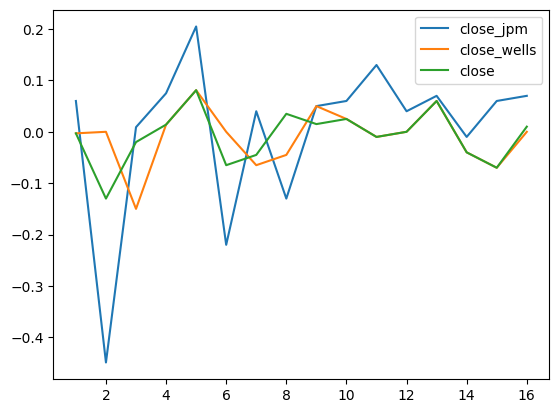

In [300]:
price_diff.plot(y=["close_jpm", "close_wells", "close"])
plt.show()

## Long format, wide format

In [291]:
df = pd.DataFrame({
    'ID': [1, 2, 3],
    'A': [10, 20, 30],
    'B': [100, 200, 300]
})


In [292]:
df

,ID,A,B
0,1,10,100
1,2,20,200
2,3,30,300


In [298]:
df_long = pd.melt(df, id_vars=["ID"], var_name="Category", value_name="Value")

In [299]:
df_long

,ID,Category,Value
0,1,A,10
1,2,A,20
2,3,A,30
3,1,B,100
4,2,B,200
5,3,B,300


In [310]:
buffer = StringIO('''
    year  jan  feb  mar  apr  ...  aug  sep  oct  nov  dec
0   2010  9.8  9.8  9.9  9.9  ...  9.5  9.5  9.4  9.8  9.3
1   2011  9.1  9.0  9.0  9.1  ...  9.0  9.0  8.8  8.6  8.5
2   2012  8.3  8.3  8.2  8.2  ...  8.1  7.8  7.8  7.7  7.9
3   2013  8.0  7.7  7.5  7.6  ...  7.2  7.2  7.2  6.9  6.7
4   2014  6.6  6.7  6.7  6.2  ...  6.1  5.9  5.7  5.8  5.6
5   2015  5.7  5.5  5.4  5.4  ...  5.1  5.0  5.0  5.1  5.0
6   2016  4.9  4.9  5.0  5.0  ...  4.9  5.0  4.9  4.7  4.7
7   2017  4.7  4.6  4.4  4.4  ...  4.4  4.2  4.1  4.2  4.1
8   2018  4.1  4.1  4.0  4.0  ...  3.8  3.7  3.8  3.7  3.9
9   2019  4.0  3.8  3.8  3.6  ...  3.7  3.5  3.6  3.5  3.5
10  2020  3.6  3.5  4.4  NaN  ...  NaN  NaN  NaN  NaN  NaN
'''.strip())

In [311]:
df = pd.read_csv(buffer, sep=r'\s+').drop(columns=["..."])


In [312]:
df

,year,jan,feb,mar,apr,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.1,5.0,5.0,5.1,5.0
6,2016,4.9,4.9,5.0,5.0,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.2,4.1,4.2,4.1
8,2018,4.1,4.1,4.0,4.0,3.8,3.7,3.8,3.7,3.9
9,2019,4.0,3.8,3.8,3.6,3.7,3.5,3.6,3.5,3.5


In [313]:
df_tall = df.melt(id_vars=["year"], var_name="month", value_name="unemployment_rate")

In [314]:
df_tall

,year,month,unemployment_rate
0,2010,jan,9.8
1,2011,jan,9.1
2,2012,jan,8.3
3,2013,jan,8.0
4,2014,jan,6.6
...,...,...,...
94,2016,dec,4.7
95,2017,dec,4.1
96,2018,dec,3.9
97,2019,dec,3.5


In [331]:
df_tall["year"] = df_tall["year"].astype(str)
df_tall["date"] = pd.to_datetime(df_tall["year"] + "-" + df_tall["month"], format="%Y-%b")

In [332]:
df_tall

,year,month,unemployment_rate,date
0,2010,jan,9.8,2010-01-01
1,2011,jan,9.1,2011-01-01
2,2012,jan,8.3,2012-01-01
3,2013,jan,8.0,2013-01-01
4,2014,jan,6.6,2014-01-01
...,...,...,...,...
94,2016,dec,4.7,2016-12-01
95,2017,dec,4.1,2017-12-01
96,2018,dec,3.9,2018-12-01
97,2019,dec,3.5,2019-12-01


In [337]:
df_sorted = df_tall.sort_values(by=["date"], ascending=[True])

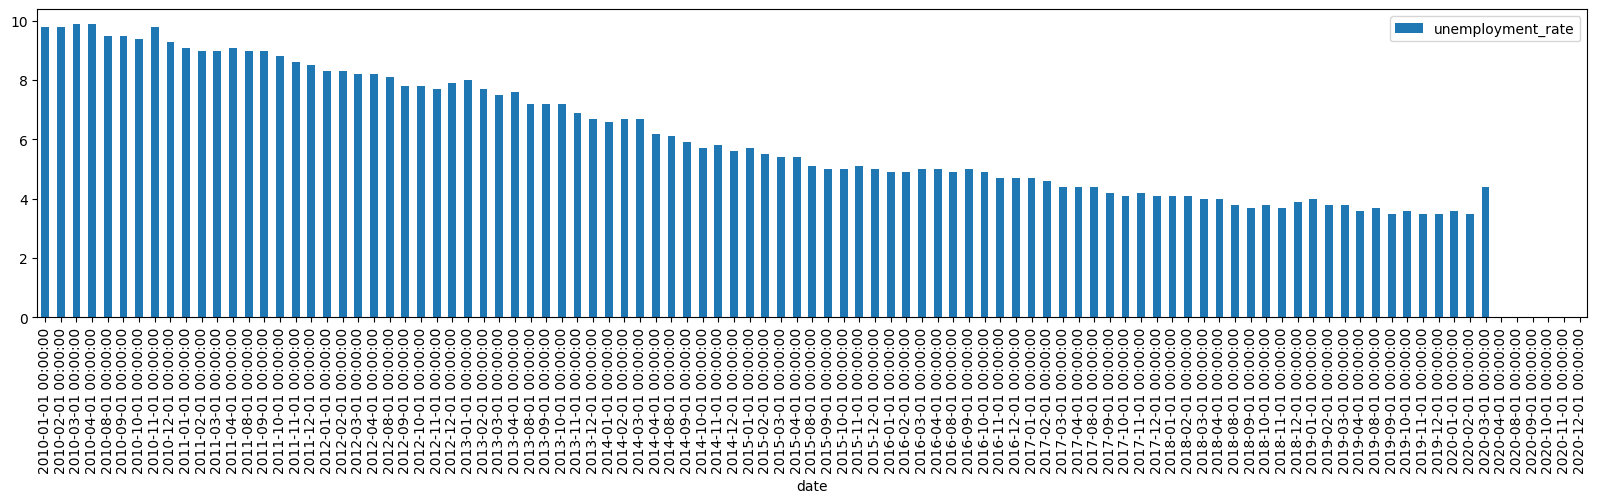

In [340]:
fig, ax = plt.subplots(figsize=(20, 4))
df_sorted.plot(x="date", y="unemployment_rate", ax=ax, kind='bar')
plt.show()

In [341]:
df

,year,jan,feb,mar,apr,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.1,5.0,5.0,5.1,5.0
6,2016,4.9,4.9,5.0,5.0,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.2,4.1,4.2,4.1
8,2018,4.1,4.1,4.0,4.0,3.8,3.7,3.8,3.7,3.9
9,2019,4.0,3.8,3.8,3.6,3.7,3.5,3.6,3.5,3.5


In [342]:
pd.read_pickle(os.path.join(data_path, "financials.p"))

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08
...,...,...,...
3224,2292,27000,3.151130e+06
3225,692,12000,6.000000e+06
3226,36095,20000,9.900000e+04
3227,14337,7000,4.247600e+05


In [344]:
buffer = StringIO('''
 metric  2007-02-01  2007-03-01  2007-04-01  2007-05-01  ...  2009-08-01  2009-09-01  2009-10-01  2009-11-01  2009-12-01
0   open       0.033      -0.060       0.025      -0.004  ...      -0.007      -0.047      -0.032       0.034      -0.051
1   high      -0.007      -0.041       0.022       0.031  ...       0.032      -0.090       0.012      -0.004       0.099
2    low      -0.016      -0.008       0.031      -0.002  ...       0.040      -0.036      -0.051       0.030       0.007
3  close      -0.057       0.022      -0.004       0.056  ...      -0.029      -0.028       0.026      -0.056       0.201'''.strip())

df = pd.read_csv(buffer, sep=r'\s+').drop(columns=["..."])

In [387]:
bond_prec = df.melt(id_vars="metric", var_name="date", value_name="close")
bond_prec

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['metric']"

In [350]:
bond_prec_close = bond_prec.query("metric == 'close'")

In [351]:
bond_prec_close

,metric,date,close
3,close,2007-02-01,-0.057
7,close,2007-03-01,0.022
11,close,2007-04-01,-0.004
15,close,2007-05-01,0.056
19,close,2009-08-01,-0.029
23,close,2009-09-01,-0.028
27,close,2009-10-01,0.026
31,close,2009-11-01,-0.056
35,close,2009-12-01,0.201


In [388]:
df = pd.read_csv(os.path.join(data_path, "players_20.csv"))

In [353]:
df.shape

(18278, 104)

In [355]:
df.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [359]:
list(df.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [389]:
cols_name = ["short_name", "age", "height_cm", "weight_kg", "nationality", "club"]


In [390]:
df = df[cols_name].copy()

In [377]:
df

,short_name,age,height_cm,weight_kg,nationality,club
0,L. Messi,32,170,72,Argentina,FC Barcelona
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid
4,E. Hazard,28,175,74,Belgium,Real Madrid
...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC


In [378]:
df.rename(columns={"short_name": "name", "height_cm": "height", "weight_kg": "weight"}, inplace=True)

In [392]:
df = df.set_index("name")
df

KeyError: "None of ['name'] are in the columns"

In [382]:
df[["height", "weight"]]

,height,weight
0,170,72
1,187,83
2,175,68
3,188,87
4,175,74
...,...,...
18273,186,79
18274,177,66
18275,186,75
18276,185,74


In [384]:
df.loc["Cristiano Ronaldo"]

KeyError: 'Cristiano Ronaldo'

In [405]:
df = pd.read_csv(os.path.join(data_path, "players_20.csv"), nrows=10)

In [396]:
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


In [406]:
cols = [name for name in list(df.columns) if "movement" in name]
df = df[cols + ["short_name"]].copy()

In [407]:
df.rename(columns={"short_name": "name"}, inplace=True)

In [408]:
df


,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,name
0,91,84,93,95,95,L. Messi
1,89,91,87,96,71,Cristiano Ronaldo
2,94,89,96,92,84,Neymar Jr
3,43,60,67,88,49,J. Oblak
4,94,88,95,90,94,E. Hazard
5,77,76,78,91,76,K. De Bruyne
6,38,50,37,86,43,M. ter Stegen
7,74,79,61,88,53,V. van Dijk
8,77,71,92,89,93,L. Modrić
9,94,92,91,92,88,M. Salah


In [421]:
df_ = pd.wide_to_long(df, stubnames=["movement"], i="name", j="movement_", sep="_", suffix=r"\w+").rename(columns={"movement": "overall_", "overall": "movement"})

In [422]:
df_

,,overall_
name,movement_,
L. Messi,acceleration,91
Cristiano Ronaldo,acceleration,89
Neymar Jr,acceleration,94
J. Oblak,acceleration,43
E. Hazard,acceleration,94
K. De Bruyne,acceleration,77
M. ter Stegen,acceleration,38
V. van Dijk,acceleration,74
L. Modrić,acceleration,77


In [424]:
df_.reset_index(inplace=True)

In [425]:
pd.pivot(df_, index="name", columns="movement_", values="overall_")

movement_,acceleration,agility,balance,reactions,sprint_speed
name,,,,,
Cristiano Ronaldo,89,87,71,96,91
E. Hazard,94,95,94,90,88
J. Oblak,43,67,49,88,60
K. De Bruyne,77,78,76,91,76
L. Messi,91,93,95,95,84
L. Modrić,77,92,93,89,71
M. Salah,94,91,88,92,92
M. ter Stegen,38,37,43,86,50
Neymar Jr,94,96,84,92,89


In [426]:
repr(pd.pivot(df_, index="name", columns="movement_", values="overall_"))

'movement_          acceleration  agility  balance  reactions  sprint_speed\nname                                                                      \nCristiano Ronaldo            89       87       71         96            91\nE. Hazard                    94       95       94         90            88\nJ. Oblak                     43       67       49         88            60\nK. De Bruyne                 77       78       76         91            76\nL. Messi                     91       93       95         95            84\nL. Modrić                    77       92       93         89            71\nM. Salah                     94       91       88         92            92\nM. ter Stegen                38       37       43         86            50\nNeymar Jr                    94       96       84         92            89\nV. van Dijk                  74       61       53         88            79'

In [427]:
print(pd.pivot(df_, index="name", columns="movement_", values="overall_"))

movement_          acceleration  agility  balance  reactions  sprint_speed
name                                                                      
Cristiano Ronaldo            89       87       71         96            91
E. Hazard                    94       95       94         90            88
J. Oblak                     43       67       49         88            60
K. De Bruyne                 77       78       76         91            76
L. Messi                     91       93       95         95            84
L. Modrić                    77       92       93         89            71
M. Salah                     94       91       88         92            92
M. ter Stegen                38       37       43         86            50
Neymar Jr                    94       96       84         92            89
V. van Dijk                  74       61       53         88            79


In [432]:
pd.pivot_table(df_, index="name", columns="movement_", aggfunc=["sum", "mean"], margins=True)


sum                                               \
                      overall_                                                
movement_         acceleration agility balance reactions sprint_speed   All   
name                                                                          
Cristiano Ronaldo           89      87      71        96           91   434   
E. Hazard                   94      95      94        90           88   461   
J. Oblak                    43      67      49        88           60   307   
K. De Bruyne                77      78      76        91           76   398   
L. Messi                    91      93      95        95           84   458   
L. Modrić                   77      92      93        89           71   422   
M. Salah                    94      91      88        92           92   457   
M. ter Stegen               38      37      43        86           50   254   
Neymar Jr                   94      96      84        92           89   455   
V. van Dijk                 74      61      53        88           79   355   
All                        771     797     746       907          780  4001   

                          mean                                                
                      overall_                                                
movement_         acceleration agility balance reactions sprint_speed    All  
name                                                                          
Cristiano Ronaldo         89.0    87.0    71.0      96.0         91.0  86.80  
E. Hazard                 94.0    95.0    94.0      90.0         88.0  92.20  
J. Oblak                  43.0    67.0    49.0      88.0         60.0  61.40  
K. De Bruyne              77.0    78.0    76.0      91.0         76.0  79.60  
L. Messi                  91.0    93.0    95.0      95.0         84.0  91.60  
L. Modrić                 77.0    92.0    93.0      89.0         71.0  84.40  
M. Salah                  94.0    91.0    88.0      92.0         92.0  91.40  
M. ter Stegen             38.0    37.0    43.0      86.0         50.0  50.80  
Neymar Jr                 94.0    96.0    84.0      92.0         89.0  91.00  
V. van Dijk               74.0    61.0    53.0      88.0         79.0  71.00  
All                       77.1    79.7    74.6      90.7         78.0  80.02